In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

In [144]:
#Load Iris dataset and Set the names of columns
data = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [145]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [147]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


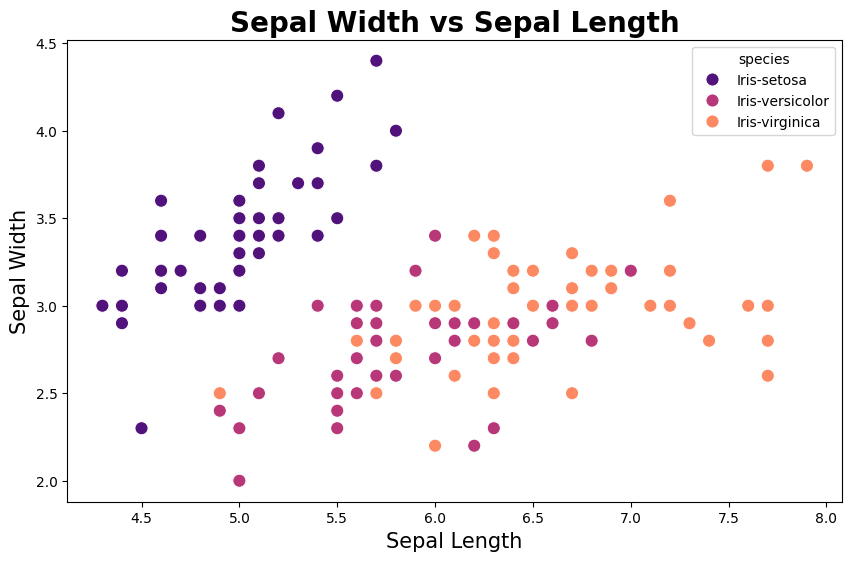

In [148]:
# scatter plot:`sepal_width` vs `sepal_length`
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', palette='magma', s=90)
plt.title('Sepal Width vs Sepal Length', fontsize=20, fontweight='bold')
plt.xlabel('Sepal Length', fontsize=15)
plt.ylabel('Sepal Width', fontsize=15)
plt.show()

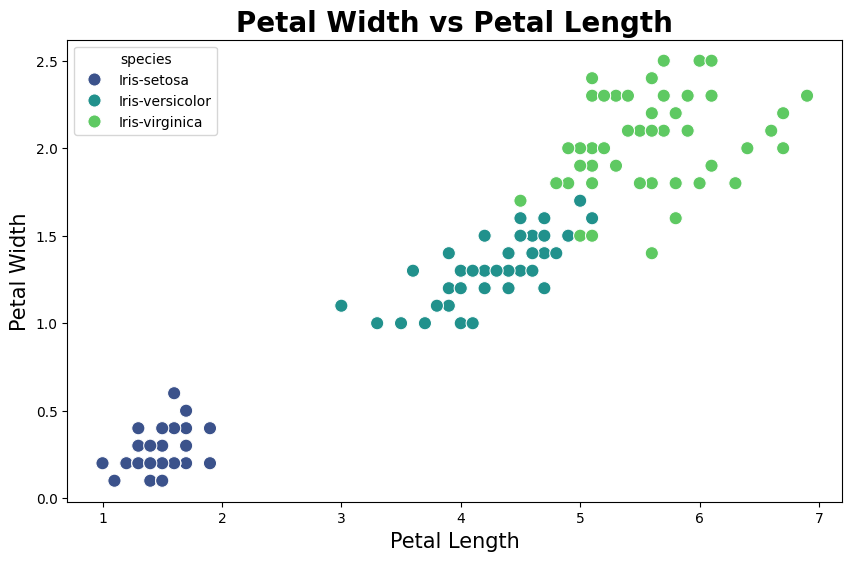

In [149]:
# scatter plot:`petal_width` vs `petal_length`
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species', palette='viridis', s=90)
plt.title('Petal Width vs Petal Length', fontsize=20, fontweight='bold')
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)
plt.show()

In [150]:
#Prepare the data for classification.
X = data.drop('species', axis=1)
Y = data['species']

In [151]:
#Split the data into `train` and `test`
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [152]:
# `K-Neighbors Classifier`from scratch
class KNN:
    def __init__(self, k=5, task='classification', distance_measure='euclidean'):
        self.k = k
        self.task = task.lower()
        self.distance_measure = distance_measure.lower()

    def fit(self, x, y):
        self.x_train = np.array(x)
        self.y_train = np.array(y)

    def predict(self, x_test):
        pred = [self._predict(i) for i in np.array(x_test)]
        return np.array(pred)

    def _predict(self, i):
        dest = [self._measure(i, x) for x in self.x_train]
        k_nns = np.argsort(dest)[:self.k]
        k_nns_labels =[self.y_train[k] for k in k_nns]

        if self.task == 'classification':
            mode = Counter(k_nns_labels).most_common(1)
            return mode[0][0]
        elif self.task == 'regression':
            return np.mean(k_nns_labels)
            
    def _measure(self, x1, x2):
        if self.distance_measure == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_measure == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.distance_measure == 'cosine':
            return np.dot(x1, x2) / (np.linalg.norm(x1)) * (np.linalg.norm(x2))
        else:
            raise ValueError('Distance measure not supported')

In [153]:
knn = KNN(k=5, distance_measure='cosine', task='classification')
knn.fit(x_train, y_train)

In [154]:
knn_pred = knn.predict(x_test)

In [155]:
accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

correct_pred = np.sum(y_test == knn_pred)
incorrect_pred = len(y_test) - correct_pred
print(f'Correct Predictions: {correct_pred}')

Accuracy: 36.67%
Correct Predictions: 22
